11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9053 - loss: 0.3083 - val_accuracy: 0.9826 - val_loss: 0.0567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9849 - loss: 0.0473 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9888 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9937 - loss: 0.0209 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9914 - val_loss: 0.0275
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9891 - loss: 0.0352

Test Accuracy: 0.9914000034332275


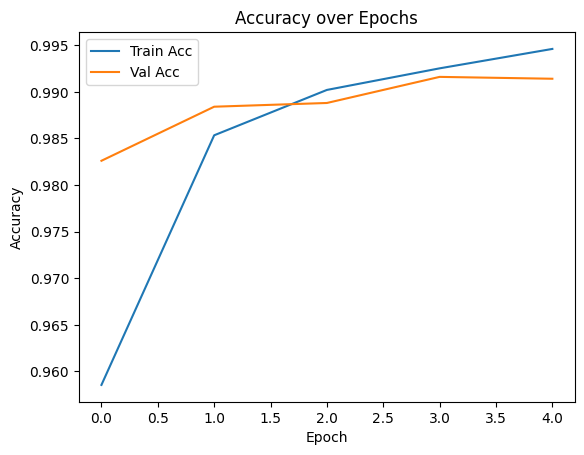

In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 2. Load and Preprocess MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
history = model.fit(X_train, y_train_cat, epochs=5,
                    validation_data=(X_test, y_test_cat))

# 6. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("\nTest Accuracy:", test_acc)

# 7. Plot Accuracy/Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
